> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Tmdb-movies data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This Dataset contains around a 10000 rows of data/movies which is about movies from the tmdp database that contains information and details about those mentioned movies like the revenue/budget or the staff in addition to some others like the popularity and the rating.

> The data set contains the following columns: id / imdb_id	/ popularity / budget / revenue / original_title / cast / homepage	director / tagline / keywords / overview  / runtime	genres / production_companies / release_date  / vote_count  / vote_average / release_year / budget_adj / revenue_adj


### Question(s) for Analysis
>**Q1**: which production_companies has better vote , revenue and popularity?

> **Q2**:(which genres has better revnue and popularity ? 

In [8]:
# in this step , i chose dataset called "tmdb-movies"and tried to know  and understand more information as how first five row looklike.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




In [9]:
d_mov = pd.read_csv('tmdb-movies.csv')

In [1]:
# Upgrade pandas to use dataframe.explode() function.


!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling




### General Properties


I wanted to see how the data cell and values looks like in my dataset in the first 5 rowsm, so I used the head() function in the following cell.

In [4]:
d_mov.head()

,Unnamed: 0,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


> **From the head fun** I have realized that there are many hyprid columns that have multible values in each cell (ex: production companies and genres)  in addition to that, I found that there are some glitches that I don't understand in the date column like having such a date (12/15/15)

I wanted to check the general shape of the dataset by using the info() and the shape() functions, so that we can catch other defeciencies that can be there in our dataset:

In [5]:
d_mov.shape

(10866, 22)

In [6]:
d_mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 22 columns):
Unnamed: 0              10866 non-null int64
id                      10866 non-null int64
imdb_id                 10866 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10866 non-null object
homepage                10866 non-null object
director                10866 non-null object
tagline                 10866 non-null object
keywords                10866 non-null object
overview                10866 non-null object
runtime                 10866 non-null int64
genres                  10866 non-null object
production_companies    10866 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year         

I wanted to check  data types of our dataset by using  the dtypes functions, so that we can catch unvalid datatype that can be there in our dataset:

> **From the info() and shape() functions** I have realized that most of the cells are in type object, in addition to that, We have also realized that 3 of the columns that we are planning to use for the analysis of our questions, have null values which should be cleaned.

I wanted to check  statistic of our dataset by using  the describe functions, so that we can catch Statistical summary that can be there in our dataset:

In [7]:
d_mov.describe()

,Unnamed: 0,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,5432.500000,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,3136.888347,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000000,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,2716.250000,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,5432.500000,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,8148.750000,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,10865.000000,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>**From the above describe table, we will just leave it here in case we needed any value from it in later process.**

I wanted to check Null values of our dataset by using  the describe functions, so that we can catch Null values that can be there in our dataset:

In [8]:
d_mov.isnull().sum()

Unnamed: 0              0
id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

I wanted to check duplicate values  of our dataset by using  the describe functions, so that we can catch duplicate values  that can be there in our dataset:

In [9]:
d_mov.duplicated().sum()

0

>**From the above two cells** We found that there is only one duplicate can be ignored in our dataset, and  we have  null values that we need to filter


### Data Cleaning

 

While there was only one duplicate in our dataset, some of which there are only one and I chose to ignore them instead of deleting them because they don't affect my dataset.

**The first thing with which I decided to start** is to delete the columns that I will not be using, to make it easy for me to edit the one I will be using.

In [13]:
d_mov.drop(['id', 'imdb_id', 'budget', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'release_date', 'vote_average', 'budget_adj',
       'revenue_adj'],  axis = 1, inplace= True)


We have deleted all the unnessecary columns that we won't be using, and we are going to check it in the following cell:

In [14]:
d_mov.columns

Index(['Unnamed: 0', 'popularity', 'revenue', 'genres', 'production_companies',
       'vote_count', 'release_year'],
      dtype='object')

**The following step which we are going to take** is to fix the null values:

In [12]:
d_mov.head()

,Unnamed: 0,popularity,revenue,genres,production_companies,vote_count,release_year
0,0,32.985763,1513528810,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,2015
1,1,28.419936,378436354,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,2015
2,2,13.112507,295238201,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,2015
3,3,11.173104,2068178225,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,2015
4,4,9.335014,1506249360,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,2015


In [13]:
d_mov.isnull().sum()

Unnamed: 0              0
popularity              0
revenue                 0
genres                  0
production_companies    0
vote_count              0
release_year            0
dtype: int64

**We have realized from the last two cells** that we must delete all null rows in our database, as the nulls cann't be alternated with neutral value 

In [14]:
d_mov.dropna(inplace=True)

In [15]:
d_mov.isnull().sum()

Unnamed: 0              0
popularity              0
revenue                 0
genres                  0
production_companies    0
vote_count              0
release_year            0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (which production_companies  has better vote , revenue and popularity?)

 I had tried to figure out what can affect a company's decision to earn so I checked the revenue and which companies have high revenue
 But I thought it depended on popularity so I looked at companies that are very popular
 Then I saw that vote_count should have an impact too so I started to figure out which companies have high vote_count
 Finally to feel confident in my choice, I filtered from three perspectives to get companies to have high vote_count, popularity and revenue.

I tried to know which collection production_companies have high revenue,vote_count and popularity  useing the mean fun so we  will  figure out what can affect a company's decision to earn.

> We started by simple analysis for each of our variables, and the relationship between them

In [16]:
# We started by listing the number of unique values of each variables so that we know our limits in analysis
d_mov.nunique()

Unnamed: 0              10866
popularity              10814
revenue                  4702
genres                   2040
production_companies     7446
vote_count               1289
release_year               56
dtype: int64

>From the above table, we realized that we have some limits in plotting our graph and our data, as we cann't plot/compare  unique values from our columns/variables, because there are a lot of them, So we decided to work on the top 5 collections of production companies as that's how we can do sth taingable

After figuring out our limits, we decided to see if there is any relationships between our numeric data, starting with the vote-count and the revenue:

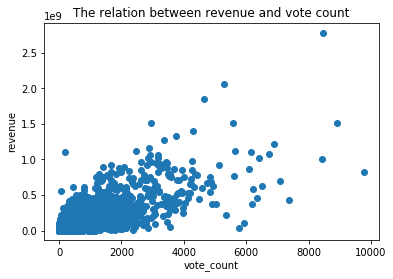

In [18]:
# We will plot them here
vote_count = d_mov['vote_count']
revenue = d_mov['revenue']
plt.scatter(vote_count, revenue, label = "points")
plt.title('The relation between revenue and vote count')
plt.xlabel('vote_count')
plt.ylabel('revenue')
plt.show()

and we as well excepect an increase in revenue with popularity, and we tested that with the following graph:


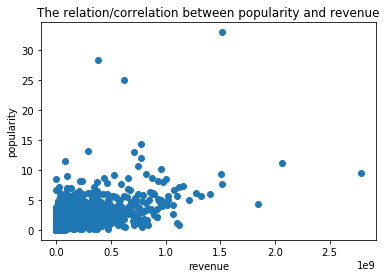

In [19]:
#Test for Does more popularity means more revenue?
revenue = d_mov['revenue']
popularity = d_mov['popularity']
plt.scatter(revenue, popularity, label = "points")
plt.title('The relation/correlation between popularity and revenue')
plt.xlabel('revenue')
plt.ylabel('popularity')
plt.show()

From the above graphs, we see that the most non-random relation is the one between vote count and popularity, others seems to be slightly random (but still have an increasing positive relation ). So we see that once we define the highst revenue collection of companies, we will be also finding the best vote_count and popularity collection of companies  

In [20]:
#First step: getting the largest five revenue collection of companies:
largest = d_mov.nlargest(5, ['revenue'])
largest.reset_index(drop=True, inplace=True)
largest

,Unnamed: 0,popularity,revenue,genres,production_companies,vote_count,release_year
0,1386,9.432768,2781505847,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,8458,2009
1,3,11.173104,2068178225,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,2015
2,5231,4.355219,1845034188,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,4654,1997
3,4361,7.637767,1519557910,Science Fiction|Action|Adventure,Marvel Studios,8903,2012
4,0,32.985763,1513528810,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,2015


In [21]:
#We found that the values in the production companies column is long, and we have to call it
#line by line (index by index), so making a function will help in avoiding the repeitition
def print_column_data(df, column):
    for i, value in enumerate(df[column]):
        print("The ", i+1, "largest collection of companies is:", f"\n[{value}]\n")

In [22]:
# calling the function
print_column_data(largest, 'production_companies')

The  1 largest collection of companies is: 
[Ingenious Film Partners|Twentieth Century Fox Film Corporation|Dune Entertainment|Lightstorm Entertainment]

The  2 largest collection of companies is: 
[Lucasfilm|Truenorth Productions|Bad Robot]

The  3 largest collection of companies is: 
[Paramount Pictures|Twentieth Century Fox Film Corporation|Lightstorm Entertainment]

The  4 largest collection of companies is: 
[Marvel Studios]

The  5 largest collection of companies is: 
[Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu]



# The answer for the question is (production_companies with better collection of vote , revenue and popularity):
* The  1 largest collection of companies is: 
[Ingenious Film Partners|Twentieth Century Fox Film Corporation|Dune Entertainment|Lightstorm Entertainment]

* The  2 largest collection of companies is: 
[Lucasfilm|Truenorth Productions|Bad Robot]

* The  3 largest collection of companies is: 
[Paramount Pictures|Twentieth Century Fox Film Corporation|Lightstorm Entertainment]

* The  4 largest collection of companies is: 
[Marvel Studios]

* The  5 largest collection of companies is: 
[Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu]

### Research Question 2  (which genres  has better  revnue and popularity ?)

I had tried to figure out what can affect a company's decision to earn so I checked the revenue and which genres have high revenue
 But I thought it depended on popularity so I looked at genres that are very popular.
 Then I saw that vote_count should have an impact too so I started to figure out which genres have high vote_count.
 Finally to feel confident in my choice, I filtered from three perspectives to get genres to have high vote_count, popularity and revenue.

first thing, we check the number of unique values in each column again, to remind ourselves with our limits:

In [15]:
d_mov.nunique()
#"""Genrs has 1926 unique value
#popularity has 9787
 #revenue has 4613"""

Unnamed: 0              10866
popularity              10814
revenue                  4702
genres                   2040
production_companies     7446
vote_count               1289
release_year               56
dtype: int64

We will consider the fqct that there are a lot of unique values in our variables

***for this question, we will take another approach by compining our two compared variables in defining the genrs as the following:***

**First** we will get the 5 largest genrs on the revenue and popularity both:


In [30]:
largest2 = d_mov.nlargest(5, ['popularity', 'revenue'])
largest2.reset_index(drop=True, inplace=True)
largest2

,Unnamed: 0,popularity,revenue,genres,production_companies,vote_count,release_year
0,0,32.985763,1513528810,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,2015
1,1,28.419936,378436354,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,2015
2,629,24.949134,621752480,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,6498,2014
3,630,14.311205,773312399,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,5612,2014
4,2,13.112507,295238201,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,2015


Then Plotting the last table as a histogram, considering that we will have to plot 2 values (popularity and revenue) for each geners

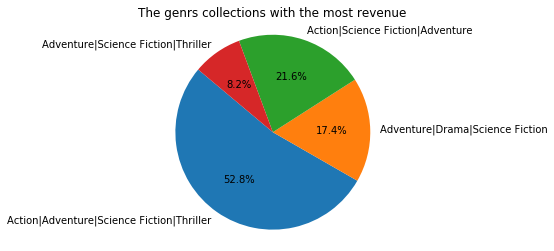

In [31]:
#First revenue for each  
genres = ['Action|Adventure|Science Fiction|Thriller', 'Adventure|Drama|Science Fiction', 'Action|Science Fiction|Adventure', 'Adventure|Science Fiction|Thriller']
revenue = [1513528810+378436354, 621752480, 773312399, 295238201]
plt.pie(revenue, labels=genres, 
        autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('The genrs collections with the most revenue')
plt.show()


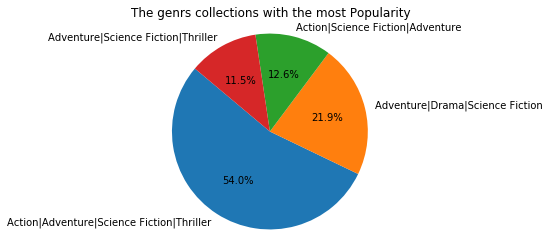

In [32]:
#Second Popularity for each  
genres = ['Action|Adventure|Science Fiction|Thriller', 'Adventure|Drama|Science Fiction', 'Action|Science Fiction|Adventure', 'Adventure|Science Fiction|Thriller']
revenue = [32.985763+28.419936, 24.949134, 14.311205, 13.112507]
plt.pie(revenue, labels=genres, 
        autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('The genrs collections with the most Popularity')
plt.show()


 **From the above graphs, we realize the following:**
* The Action|Adventure|Science Fiction|Thriller is the largest one regarding popularity and revenue
* The rest of the top 4 have different values regarding the order of the values in both popularity and revenue as the 
following:

| collection | order in revenue | order in popularity |

|Action-Adventure-Science Fiction-Thriller| 1 | 1 |

| Adventure-Drama-Science Fiction | 3 | 2 |

| Action-Science Fiction-Adventure | 2 | 3 |

| Adventure-Science Fiction-Thriller | 4 | 4 |

<a id='conclusions'></a>
## Conclusions

> Finally, what we concluded from the Analyses is that The  1 largest collection of companies is: 
[Ingenious Film Partners|Twentieth Century Fox Film Corporation|Dune Entertainment|Lightstorm Entertainment]

* The  2 largest collection of companies is: 
[Lucasfilm|Truenorth Productions|Bad Robot]

* The  3 largest collection of companies is: 
[Paramount Pictures|Twentieth Century Fox Film Corporation|Lightstorm Entertainment]

* The  4 largest collection of companies is: 
[Marvel Studios]

* The  5 largest collection of companies is: 
[Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu]

, while the genres of movies that achieve the most popularity and revenue are The Action|Adventure|Science Fiction|Thriller
 so it is possible in the future to focus on them.
 I think if it is possible to use the analysis for time to get clearer results.
 



## Limitations
>we found that there are some glitches that we don't understand in the date column like having such a date (12/15/15).
> we cann't plot/compare unique values from our columns/variables, because there are a lot of them in our dataset.

In [3]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_tmdb-movies.ipynb'])

255